# Data Preprocessing

In [41]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridsearchCV
from sklearn.model_selection import KFold
import pickle

AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DatasetsPair'

In [13]:
data=pd.read_csv(r"C:\Users\durga\Downloads\Milk Grading (1).csv")

In [14]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5


In [15]:
data.shape

(1059, 8)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 66.3 KB


# Visualization

Univariate Analysis

C:\Users\durga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


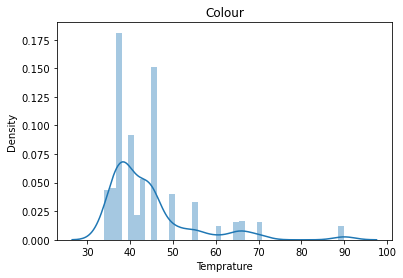

In [17]:
sns.distplot(data['Temprature'])
plt.title('Colour')
plt.show()

# Bivariate Analysis

In [18]:
def countplot_of_2(x,hue,title=None,figsize=(6,5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=data[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.show()

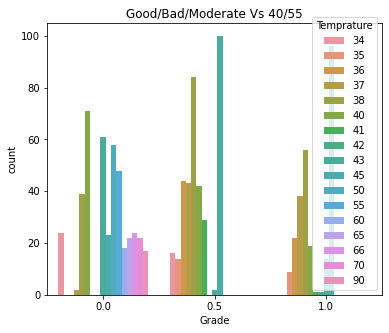

In [19]:
countplot_of_2('Grade','Temprature','Good/Bad/Moderate Vs 40/55')

barplot for pH and Grade

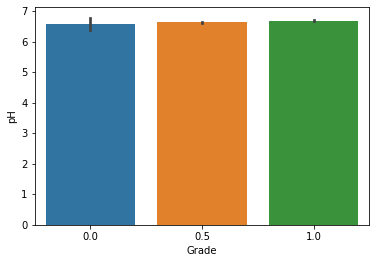

In [20]:
sns.barplot(x = 'Grade',
            y = 'pH',
            data = data)

plt.show()

boxplot for Colour and Grade

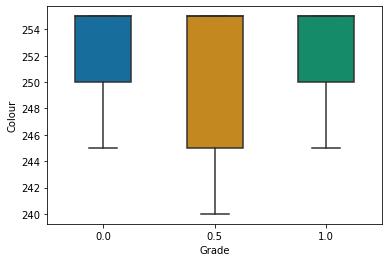

In [21]:
bplot = sns.boxplot(y='Colour', x='Grade',
                   data=data,
                   width=0.5,
                   palette="colorblind")

scatterplot for Temperature and Grade

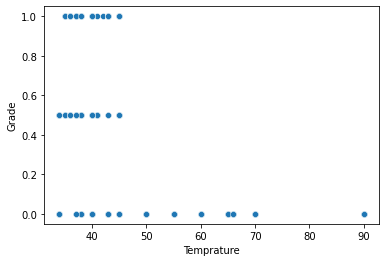

In [22]:
sns.scatterplot(data = data, x = "Temprature",y = "Grade")

plt.show()

# Multivariate Analysis

create swarmplot

C:\Users\durga\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\durga\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\durga\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\durga\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\durga\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.0% of the points

<AxesSubplot:xlabel='Temprature', ylabel='Grade'>

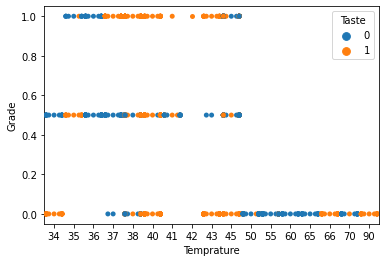

In [23]:
import seaborn as sns
sns.swarmplot(x="Temprature", y="Grade", hue="Taste", data=data)

# Descriptive Analysis

In [24]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.418319
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.393934
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,0.500000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,0.500000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000


In [25]:
data['Grade'].value_counts()

0.0    429
0.5    374
1.0    256
Name: Grade, dtype: int64

In [26]:
data.loc[data['Grade']==0,'Grade'] = 'Bad'
data.loc[data['Grade']==0.5,'Grade'] = 'Moderate'
data.loc[data['Grade']==1,'Grade'] = 'Good'

# Outlier Detection

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [28]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Detecting the Outliers

C:\Users\durga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pH'>

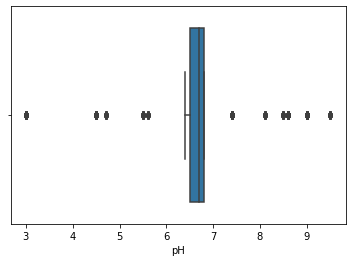

In [29]:
sns.boxplot(data['pH'])

# Train Test Split

In [30]:
x = data.drop('Grade',axis=1)

In [31]:
print(x)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0     6.6          35      1     0     1          0     254
1     6.6          36      0     1     0          1     253
2     8.5          70      1     1     1          1     246
3     9.5          34      1     1     0          1     255
4     6.6          37      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1054  6.7          45      1     1     0          0     247
1055  6.7          38      1     0     1          0     255
1056  3.0          40      1     1     1          1     255
1057  6.8          43      1     0     1          0     250
1058  8.6          55      0     1     1          1     255

[1059 rows x 7 columns]


In [32]:
y=data['Grade']
print(y)

0           Good
1           Good
2            Bad
3            Bad
4       Moderate
          ...   
1054    Moderate
1055        Good
1056         Bad
1057        Good
1058         Bad
Name: Grade, Length: 1059, dtype: object


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Oversampling Technique

In [34]:
from imblearn import over_sampling

AttributeError: module 'sklearn.metrics._dist_metrics' has no attribute 'DatasetsPair'

In [35]:
os = over_sampling.RandomOverSampler(random_state=0)

NameError: name 'over_sampling' is not defined

In [ ]:
x,y =os.fit_resample(x,y)

In [ ]:
y.value_counts()

# Model Building

SVC model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict)
test_accuracy

In [ ]:
y_train_predict=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict)
train_accuracy

Random forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict1)
test_accuracy

In [ ]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict2)
test_accuracy

In [ ]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

Extra Tree Classifier Model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict3)
test_accuracy

In [ ]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy

# Parameter Tuning

GridsearchCV

Hyper parameter tuning using GridsearchCV for SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
                "kernel":['linear','rbf','sigmoid'],"gamma":['scale','auto'],
                "break_ties":['bool','default=False']
}

In [ ]:
from sklearn.model_selection import KFold
svc1=SVC()
gdcv= GridSearchCV(estimator=svc1,param_grid=parameters)

In [ ]:
gdcv.fit(x_train,y_train)

In [ ]:
gdcv.best_params_

In [ ]:
from sklearn.metrics import accuracy_score
svc1=SVC(kernel='rbf',gamma='auto',break_ties='bool')
svc1.fit(x_train,y_train)
y_train_pred1=svc1.predict(x_train)
y_test_pred1=svc1.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred1,y_train))
print("train accuracy",accuracy_score(y_test_pred1,y_test))

In [ ]:
from sklearn.metrics import accuracy_score
rfc2=RandomForestClassifier(criterion='entropy',min_samples_split=2,n_estimators=5,warm_start='False',random_state=111)
rfc2.fit(x_train,y_train)
y_train_pred2=rfc2.predict(x_train)
y_test_pred2=rfc2.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred2,y_train))
print("train accuracy",accuracy_score(y_test_pred2,y_test))

Hyper parameter tuning using GridSearchCV for ETC

In [ ]:
parameters={"n_estimators":[2,5,10,15,20,25],"criterion":['entropy'],
                "min_samples_split":[2],
                "min_samples_leaf":[1],"random_state":[111]
               }

In [ ]:
etc3=ExtraTreesClassifier()
gdcv2 = GridSearchCV(estimator=etc3,param_grid=parameters)

In [ ]:
gdcv2.fit(x_train,y_train)

In [ ]:
gdcv2.best_params_

In [ ]:
from sklearn.metrics import accuracy_score
etc3=RandomForestClassifier(criterion='entropy',min_samples_split=2,n_estimators=5,warm_start='False',random_state=111)
etc3.fit(x_train,y_train)
y_train_pred3=etc3.predict(x_train)
y_test_pred3=etc3.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred3,y_train))
print("train accuracy",accuracy_score(y_test_pred3,y_test))

Hyper parameter tuning using GridSearchCV for DTC

In [ ]:
parameters = {"criterion":['entropy'],
             "splitter":['best'],
             "min_samples_split":[2],"random_state":[111]}

In [ ]:
dtc4=DecisionTreeClassifier()
gdcv3 = GridSearchCV(estimator=dtc4,param_grid=parameters)

In [ ]:
gdcv3.fit(x_train,y_train)

In [ ]:
gdcv3.best_params_

In [ ]:
from sklearn.metrics import accuracy_score
dtc4=DecisionTreeClassifier(splitter='best',min_samples_split=2,criterion='entropy',random_state=111)
dtc4.fit(x_train,y_train)
y_train_pred4=dtc4.predict(x_train)
y_test_pred4=dtc4.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred4,y_train))
print("train accuracy",accuracy_score(y_test_pred4,y_test))

# Comparision of Models

In [ ]:
def compareModel():
    print("train accuracy for svc1",accuracy_score(y_train_pred1,y_train))
    print("train accuracy for svc1",accuracy_score(y_test_pred1,y_test))
    print("train accuracy for rfc1",accuracy_score(y_train_pred2,y_train))
    print("train accuracy for rfc1",accuracy_score(y_test_pred2,y_test))
    print("train accuracy for dtc1",accuracy_score(y_train_pred4,y_train))
    print("train accuracy for dtc1",accuracy_score(y_test_pred4,y_test))
    print("train accuracy for etc1",accuracy_score(y_train_pred3,y_train))
    print("train accuracy for etc1",accuracy_score(y_test_pred3,y_test))

In [ ]:
compareModel()

# Evaluation of the Model &Save the Model

In [ ]:
from sklearn.metrics import accuracy_score
svc1=SVC(kernel='rbf',gamma='auto',break_ties='bool')
svc1.fit(x_train,y_train)
y_train_pred1=svc1.predict(x_train)
y_test_pred1=svc1.predict(x_test)
print("train accuracy",accuracy_score(y_train_pred1,y_train))
print("train accuracy",accuracy_score(y_test_pred1,y_test))

In [ ]:
import pickle
pickle.dump(svc1,open('milk.pkl','wb'))